## Outliers

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Datapoints which are far awaya from obsereved values

Out of the box values

Smaller or Larger Values than remaining values

20-60 >> 350

150-200 >> 5

In [2]:
arr1 = np.random.randint(20,60, size = 20)
arr1

array([21, 33, 57, 26, 38, 27, 58, 48, 28, 58, 56, 27, 22, 38, 46, 45, 43,
       55, 34, 54])

In [3]:
arr2 = np.array([58, 41, 48, 270, 50, 47, 22, 43, 41, 34, 20, 49, 59, 47, 259, 22, 35,49, 27, 38])
arr2

array([ 58,  41,  48, 270,  50,  47,  22,  43,  41,  34,  20,  49,  59,
        47, 259,  22,  35,  49,  27,  38])

## How outliers are introduced in the datasets?

In [ ]:
1. Data Entry Error:
    Human Error
    Age 30 >> 300
    
2. Measurement Error:
    Machine Error/Inrumental error
    Cricket >> Speed Gun
    130 to 150
    
3. Intententional Error:
    Dummy Datasets/Sample Datasets
    
4. Sampling Error:
    Mixing of data from wrong resources
    
    
5. Natural Error:
    Most actual outliers Data belongs to this category

## How to Detect Outliers

In [ ]:
1. Boxplot
2. Z-score(Normal Distribution)
3. IQR Method
4. Scatterplot

## How to Handle Outliers

In [ ]:
1. Delete Observations/Trimming(Not Preferable)
2. Imputation/Caping:
    1. Mean
    2. Median
    3. Zero
    4. Lower tail
    5. Upper Tail
    6. any static value
3. Transformations: Used to reduce the impact of outliers
    1. Log Transformation
    2. Square root 
    3. Cube root
    4. reciprocal
    5. Box-Cox
    6. Standardization
    7. Robust Scaler

## Impact of outliers

In [ ]:
1. Reduce the power of Statistical Analysis
2. High impact on mean and std values
3. Algorithm do not perform well in presence of outliers
4. Impact on basic assumption regreesion (normality, homoscedasticity)

## Impact of Outliers in ML Algorithm

### 1. Sensitive to Outliers

In [ ]:
1. Linear Regression
2. Logistic Regression
3. K-Nearest Neighbor
4. Support vector Machine
5. K-Means Clustering

## 2. Not Sensitive to Outliers

In [ ]:
1. Decision Tree
2. Random Forest
3. AdaBoost
4. Gradient Boost
5. XGBoost
6. Naive Bayes

<AxesSubplot:ylabel='Density'>

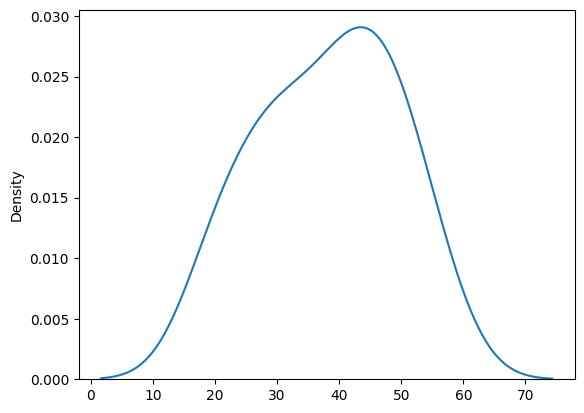

In [6]:
sns.kdeplot(arr1)

<AxesSubplot:ylabel='Density'>

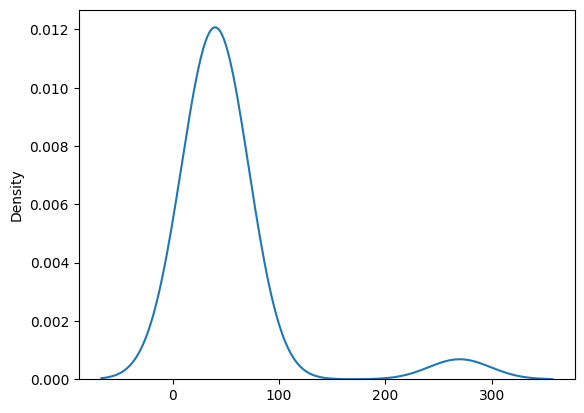

In [7]:
sns.kdeplot(arr2)

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

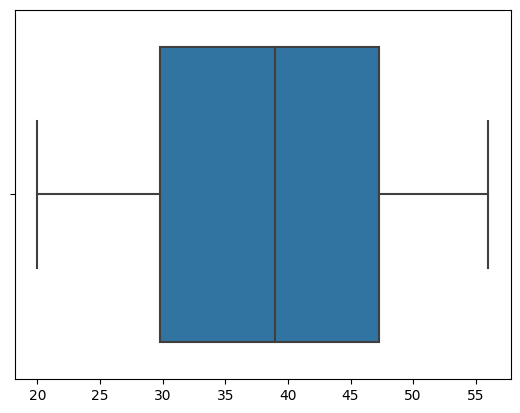

In [8]:
sns.boxplot(arr1)

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

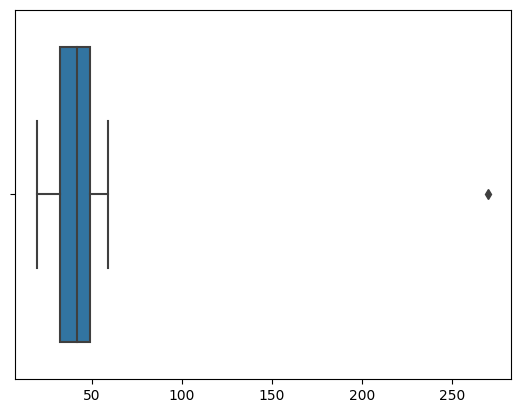

In [9]:
sns.boxplot(arr2)

In [13]:
arr3 = np.array([58, 41, 48, 270, 50, 47, 22, 43, 41, 34, 2, 49, 59, 47, 25, 22, 35,49, 27, 38])
arr3

array([ 58,  41,  48, 270,  50,  47,  22,  43,  41,  34,   2,  49,  59,
        47,  25,  22,  35,  49,  27,  38])

C:\Users\cheta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

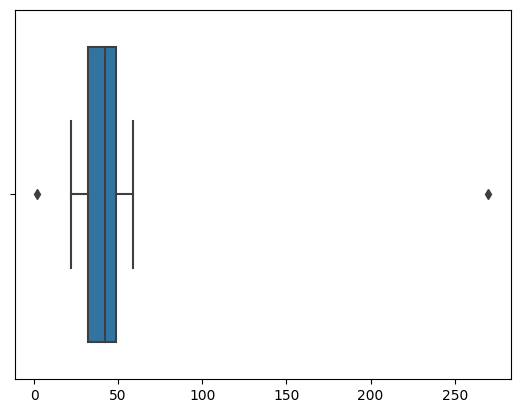

In [14]:
sns.boxplot(arr3)

### 1. Z-Score Method

In [ ]:
When Data Distribution is normal
Most of the values lies around mean
std >> how far away is our datapoint is from mean
z-score >> how many std away datapoint is

outlier treatment:
    1. Trimming (drop)
    2. Capping (impute)

In [ ]:
# Standardization

z-score = (x - x_mean)/ std
x = datapoint
x_mean = mean value
std = standard deviation

<AxesSubplot:ylabel='Density'>

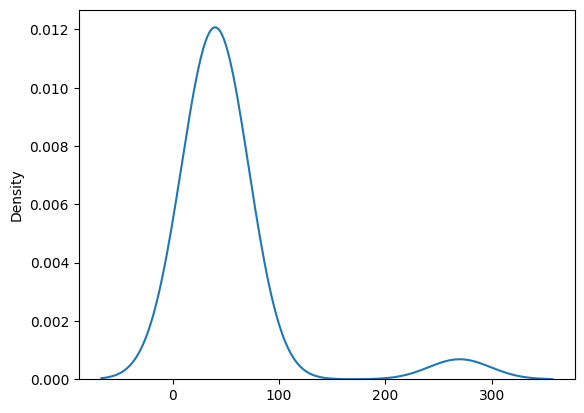

In [17]:
sns.kdeplot(arr2)

In [18]:
from scipy.stats import skew

In [19]:
skew(arr2)

3.790562861676956

In [20]:
skew(arr1)

-0.17244207336172385

In [22]:
print(arr1)
mean = np.mean(arr1)
std = np.std(arr1)
print(f'Mean=={mean}, std =={std}')

[54 47 56 42 20 39 45 34 28 43 29 22 38 50 20 49 39 48 30 30]
Mean==38.15, std ==10.831781940198022


In [23]:
x = 31
z_score_x = (x - mean)/std
z_score_x

-0.6600945291804208

In [24]:
x = 59
z_score_x = (x - mean)/std
z_score_x

1.924891039638011

In [25]:
x = 210
z_score_x = (x - mean)/std
z_score_x

15.865348928623124

In [28]:
print(arr1)
mean = np.mean(arr1)
std = np.std(arr1)
print(f'Mean=={mean}, std =={std}')

threshold = 3
outliers_list = []

for x_val in arr1:
    z_score = (x_val - mean)/std
    z_score = np.abs(z_score)
    print(x_val, '>>', z_score)
    
    if z_score > threshold:
        outliers_list.append(x_val)
        
print('Outliers are:', outliers_list)

[54 47 56 42 20 39 45 34 28 43 29 22 38 50 20 49 39 48 30 30]
Mean==38.15, std ==10.831781940198022
54 >> 1.4632864737775766
47 >> 0.8170400815729687
56 >> 1.6479283001217504
42 >> 0.3554355157125345
20 >> 1.6756245740733762
39 >> 0.07847277619627395
45 >> 0.632398255228795
34 >> 0.3831317896641603
28 >> 0.9370572686966814
43 >> 0.44775642888462136
29 >> 0.8447363555245945
22 >> 1.4909827477292024
38 >> 0.013848136975812896
50 >> 1.0940028210892292
20 >> 1.6756245740733762
49 >> 1.0016819079171424
39 >> 0.07847277619627395
48 >> 0.9093609947450556
30 >> 0.7524154423525077
30 >> 0.7524154423525077
Outliers are: []


In [29]:
print(arr2)
mean = np.mean(arr2)
std = np.std(arr2)
print(f'Mean=={mean}, std =={std}')

threshold = 3
outliers_list = []

for x_val in arr2:
    z_score = (x_val - mean)/std
    z_score = np.abs(z_score)
    print(x_val, '>>', z_score)
    
    if z_score > threshold:
        outliers_list.append(x_val)
        
print('Outliers are:', outliers_list)

[ 58  41  48 270  50  47  22  43  41  34  20  49  59  47  25  22  35  49
  27  38]
Mean==51.25, std ==51.47608668109883
58 >> 0.13112884904824143
41 >> 0.19912158559177404
48 >> 0.06313611250470884
270 >> 4.249546033970788
50 >> 0.024283120194118785
47 >> 0.08256260866000387
22 >> 0.5682250125423796
43 >> 0.16026859328118398
41 >> 0.19912158559177404
34 >> 0.3351070586788392
20 >> 0.6070780048529696
49 >> 0.04370961634941382
59 >> 0.15055534520353647
47 >> 0.08256260866000387
25 >> 0.5099455240764945
22 >> 0.5682250125423796
35 >> 0.3156805625235442
49 >> 0.04370961634941382
27 >> 0.47109253176590443
38 >> 0.2574010740576591
Outliers are: [270]


In [30]:
22 = 51.25 - z * (51.47)
z = (22 - 51.25)/51.47

-0.5682922090538177

In [31]:
(22 - 51.25)/51.47

-0.5682922090538177

In [4]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

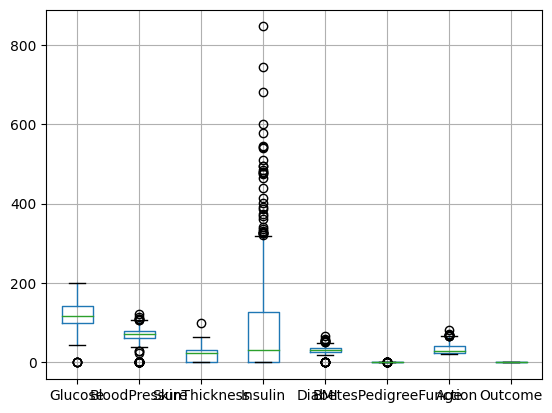

In [33]:
df.boxplot()

In [43]:
def get_outliers(col):
    
    mean = col.mean()
    std = col.std()
    print(f'Mean== {mean}')
    print(f'std == {std}')

    threshold = 3
    outliers_list = []

    for x_val in col.values:
        z_score = (x_val - mean)/std
        z_score = np.abs(z_score)

        if z_score > threshold:
            print(f'x == {x_val} and zscore == {z_score}')
            outliers_list.append(x_val)
    return outliers_list
    
get_outliers(df['Insulin'])

Mean== 79.79947916666667
std == 115.24400235133817
x == 543 and zscore == 4.019302622111291
x == 846 and zscore == 6.648506691892384
x == 495 and zscore == 3.6027950467004253
x == 485 and zscore == 3.516022635156495
x == 495 and zscore == 3.6027950467004253
x == 478 and zscore == 3.4552819470757434
x == 744 and zscore == 5.7634280941442935
x == 680 and zscore == 5.208084660263139
x == 545 and zscore == 4.036657104420077
x == 465 and zscore == 3.3424778120686343
x == 579 and zscore == 4.331683303669441
x == 474 and zscore == 3.420572982458171
x == 480 and zscore == 3.4726364293845298
x == 600 and zscore == 4.513905367911695
x == 440 and zscore == 3.125546783208808
x == 540 and zscore == 3.9932708986481122
x == 480 and zscore == 3.4726364293845298
x == 510 and zscore == 3.732953664016321


[543,
 846,
 495,
 485,
 495,
 478,
 744,
 680,
 545,
 465,
 579,
 474,
 480,
 600,
 440,
 540,
 480,
 510]

In [5]:
from scipy.stats import zscore

In [46]:
zscore(df['Insulin'])

0     -0.692891
1     -0.692891
2     -0.692891
3      0.123302
4      0.765836
         ...   
763    0.870031
764   -0.692891
765    0.279594
766   -0.692891
767   -0.692891
Name: Insulin, Length: 768, dtype: float64

In [48]:
def get_outliers(col):
    
    threshold = 3
    outliers_list = []

    z_score = zscore(col)
    index  = np.where(np.abs(z_score) > threshold)[0]
#     print(index)
    print(col.iloc[index])
#     return outliers_list
    
get_outliers(df['Insulin'])

8      543
13     846
111    495
153    485
186    495
220    478
228    744
247    680
286    545
370    465
409    579
415    474
486    480
584    600
645    440
655    540
695    480
753    510
Name: Insulin, dtype: int64


In [54]:
z_score_values = zscore(df['Insulin'])
outliers_index  = np.where(np.abs(z_score_values) > threshold)[0]
# print(outliers_index)
df.iloc[outliers_index]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,150,70,45,543,30.5,0.158,35,1
13,150,60,23,846,30.1,0.398,59,1
111,155,62,26,495,34.0,0.543,46,1
153,153,82,42,485,40.6,0.687,23,0
186,181,68,36,495,30.1,0.615,60,1
220,177,60,29,478,34.6,1.072,21,1
228,197,70,39,744,36.7,2.329,31,0
247,165,90,33,680,52.3,0.427,23,0
286,155,84,44,545,38.7,0.619,34,0
370,173,82,48,465,38.4,2.137,25,1


## 2. IQR (Inter Quartile Range)

In [ ]:
Use when data is not normally distributed (skewed)

Boxplot:
    Median (Q2/50%ile):
        Middle value of dataset
        
    1st Quartile(Q1/25%ile):
        middle no between min and median
        
    3rd Quartile(Q3/75%ile):
        middle no between median and max
        
    IQR :
        25% to 75%
        
    minimum = Q1 - 1.5*IQR
    maximum = Q3 + 1.5*IQR

In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Glucose'].median()

117.0

In [8]:
df['Glucose'].quantile(0.5)

117.0

<AxesSubplot:>

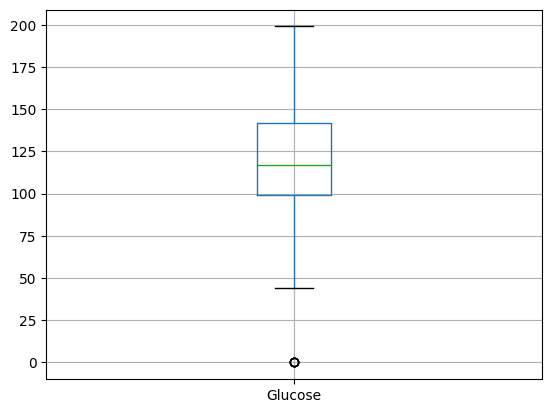

In [9]:
df[['Glucose']].boxplot()

<AxesSubplot:xlabel='Glucose'>

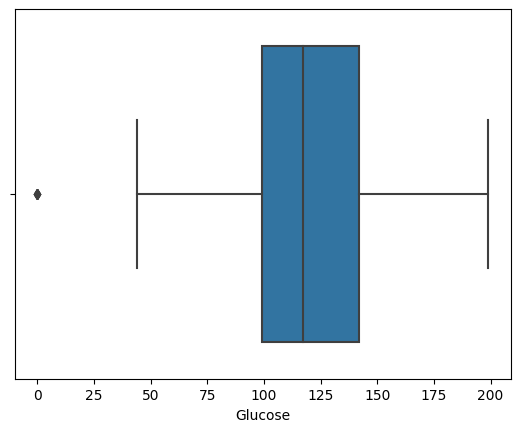

In [11]:
import matplotlib
%matplotlib inline
sns.boxplot(x = df['Glucose'])

<AxesSubplot:>

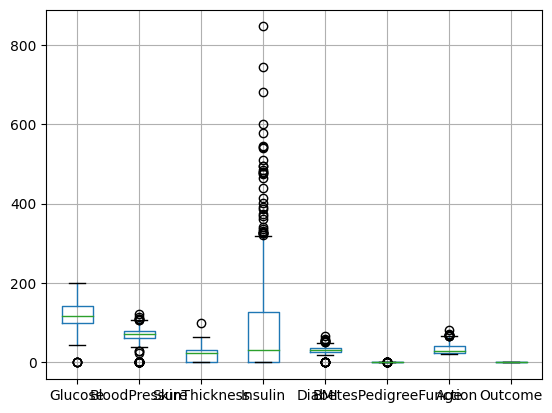

In [16]:
df.boxplot()

In [14]:
q1 = df['Glucose'].quantile(0.25)
q2 = df['Glucose'].quantile(0.5)
q3 = df['Glucose'].quantile(0.75)

print('Q1 == ',q1)
print('Q2 == ',q2)
print('Q3 == ',q3)

iqr = q3 - q1
print('IQR == ',iqr)

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('Upper Tail == ', upper_tail)
print('Lower Tail == ', lower_tail)

Q1 ==  99.0
Q2 ==  117.0
Q3 ==  142.0
IQR ==  43.0
Upper Tail ==  206.5
Lower Tail ==  34.5


In [15]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.5)
q3 = df['Insulin'].quantile(0.75)

print('Q1 == ',q1)
print('Q2 == ',q2)
print('Q3 == ',q3)

iqr = q3 - q1
print('IQR == ',iqr)

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('Upper Tail == ', upper_tail)
print('Lower Tail == ', lower_tail)

Q1 ==  0.0
Q2 ==  30.5
Q3 ==  127.25
IQR ==  127.25
Upper Tail ==  318.125
Lower Tail ==  -190.875


In [17]:
df[df['Insulin'] > upper_tail]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,150,70,45,543,30.5,0.158,35,1
13,150,60,23,846,30.1,0.398,59,1
54,150,66,42,342,34.7,0.718,42,0
111,155,62,26,495,34.0,0.543,46,1
139,105,72,29,325,36.9,0.159,28,0
153,153,82,42,485,40.6,0.687,23,0
186,181,68,36,495,30.1,0.615,60,1
220,177,60,29,478,34.6,1.072,21,1
228,197,70,39,744,36.7,2.329,31,0
231,134,80,37,370,46.2,0.238,46,1


In [18]:
df['Insulin'][df['Insulin'] > upper_tail]

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

In [19]:
df['Insulin'].loc[df['Insulin'] > upper_tail] = upper_tail

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

In [20]:
def get_iqr(col):   
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ',q1)
    print('Q2 == ',q2)
    print('Q3 == ',q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)
    
get_iqr(df['Insulin'])

Q1 ==  0.0
Q2 ==  30.5
Q3 ==  127.25
IQR ==  127.25
Upper Tail ==  318.125
Lower Tail ==  -190.875


In [21]:
get_iqr(df['Age'])

Q1 ==  24.0
Q2 ==  29.0
Q3 ==  41.0
IQR ==  17.0
Upper Tail ==  66.5
Lower Tail ==  -1.5


In [5]:
titanic_df  = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Age', ylabel='Density'>

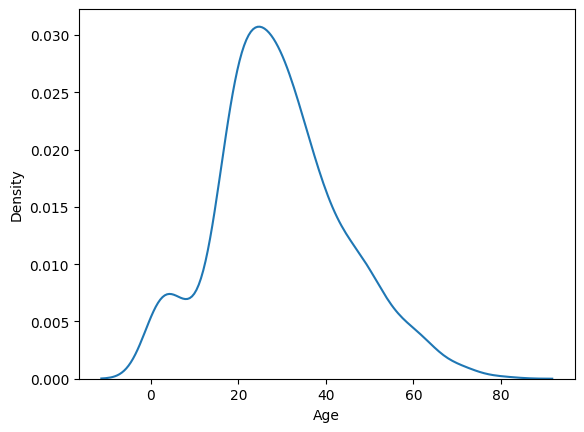

In [24]:
sns.kdeplot(titanic_df['Age'])

### Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Gender'>

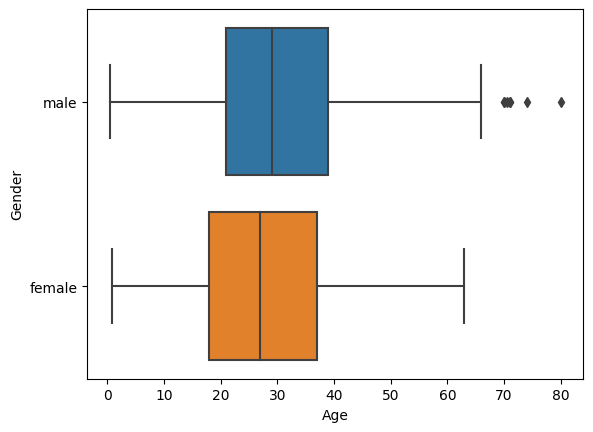

In [26]:
sns.boxplot(x= titanic_df['Age'], y=titanic_df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

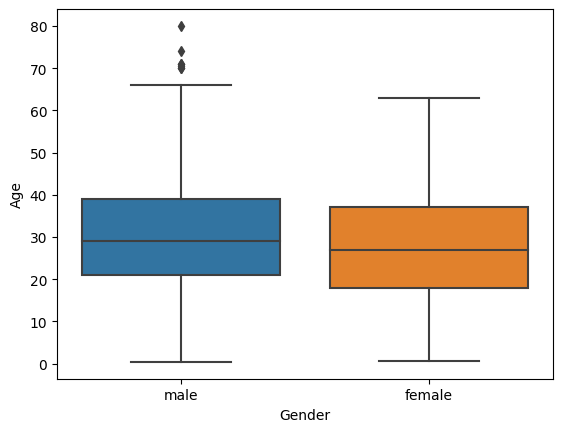

In [27]:
sns.boxplot(y= titanic_df['Age'], x=titanic_df['Gender'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

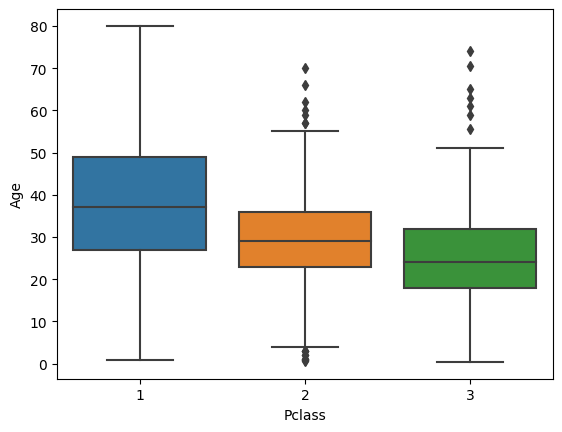

In [28]:
sns.boxplot(y= titanic_df['Age'], x=titanic_df['Pclass'])

## Multivariate Analysis

In [29]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Age'>

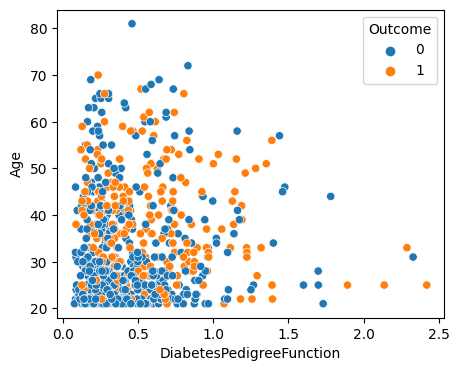

In [32]:
plt.figure(figsize=(5,4))
sns.scatterplot(x = df['DiabetesPedigreeFunction'], y = df['Age'], hue = df['Outcome'])

In [6]:
insurance_df = pd.read_csv('medical_insurance.csv')
insurance_df


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:xlabel='age', ylabel='bmi'>

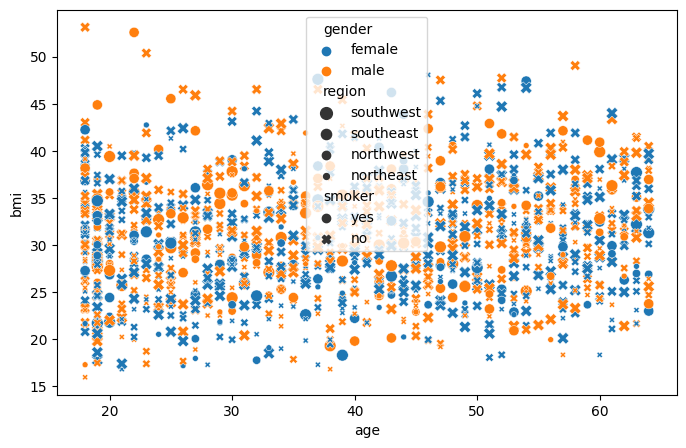

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = insurance_df['age'], y = insurance_df['bmi'], hue = insurance_df['gender'],
               style=insurance_df['smoker'], size=insurance_df['region'])

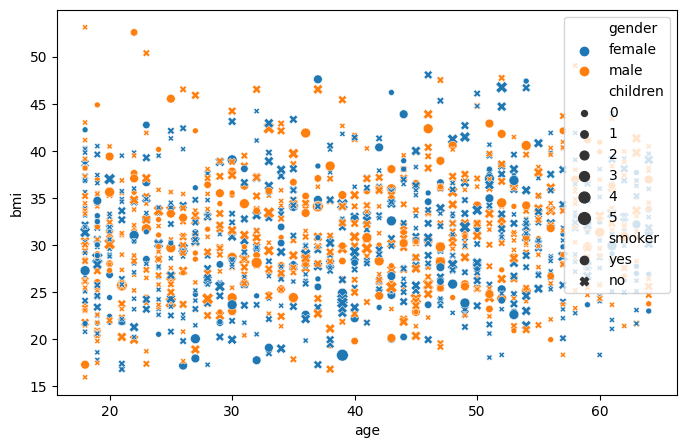

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = insurance_df['age'], y = insurance_df['bmi'], hue = insurance_df['gender'],
               style=insurance_df['smoker'], size=insurance_df['children'])

plt.legend(loc='best')

## Handling Outliers

In [ ]:
1. Delete Observation
2. Imputations(mean, median, uppertail....)
3. Data transformations

## 1. Trimming(Delete)

In [47]:
df1 = df.copy()

In [51]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.5)
q3 = df['Insulin'].quantile(0.75)

print('Q1 == ',q1)
print('Q2 == ',q2)
print('Q3 == ',q3)

iqr = q3 - q1
print('IQR == ',iqr)

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('Upper Tail == ', upper_tail)
print('Lower Tail == ', lower_tail)

ind = df['Insulin'].loc[df['Insulin'] > upper_tail].index
# np.where(df['Insulin'] > upper_tail)
print(ind)

df.drop(ind)

Q1 ==  0.0
Q2 ==  30.5
Q3 ==  127.25
IQR ==  127.25
Upper Tail ==  318.125
Lower Tail ==  -190.875
Int64Index([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258,
            286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584,
            612, 645, 655, 695, 707, 710, 715, 753],
           dtype='int64')


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


#### drop

In [ ]:
df.drop([column_list or row_list], axis = 0)

<AxesSubplot:>

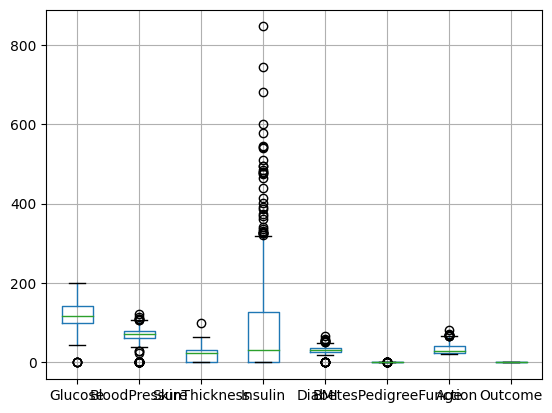

In [52]:
df.boxplot()

In [55]:
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.5)
q3 = df['BloodPressure'].quantile(0.75)

print('Q1 == ',q1)
print('Q2 == ',q2)
print('Q3 == ',q3)

iqr = q3 - q1
print('IQR == ',iqr)

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('Upper Tail == ', upper_tail)
print('Lower Tail == ', lower_tail)

ind = df['BloodPressure'].loc[(df['BloodPressure'] > upper_tail) | (df['BloodPressure'] < lower_tail)].index
# np.where(df['Insulin'] > upper_tail)
print(ind)

df.drop(ind)

Q1 ==  62.0
Q2 ==  72.0
Q3 ==  80.0
IQR ==  18.0
Upper Tail ==  107.0
Lower Tail ==  35.0
Int64Index([  7,  15,  18,  43,  49,  60,  78,  81,  84, 106, 125, 172, 177,
            193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430,
            435, 453, 468, 484, 494, 522, 533, 535, 549, 589, 597, 601, 604,
            619, 643, 691, 697, 703, 706],
           dtype='int64')


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [58]:
def delete_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ',q1)
    print('Q2 == ',q2)
    print('Q3 == ',q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)

    ind = col.loc[(col > upper_tail) | (col < lower_tail)].index
    # np.where(df['Insulin'] > upper_tail)
#     print(ind)
    return ind
#     df.drop(ind)

bp_outliers = delete_outliers(df['BloodPressure'])

df.drop(bp_outliers)

Q1 ==  62.0
Q2 ==  72.0
Q3 ==  80.0
IQR ==  18.0
Upper Tail ==  107.0
Lower Tail ==  35.0


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


## Extreme Outliers

In [59]:
def delete_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ',q1)
    print('Q2 == ',q2)
    print('Q3 == ',q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail = q3 + 3*iqr
    lower_tail = q1 - 3*iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)

    ind = col.loc[(col > upper_tail) | (col < lower_tail)].index
    # np.where(df['Insulin'] > upper_tail)
#     print(ind)
    return ind
#     df.drop(ind)

bp_outliers = delete_outliers(df['BloodPressure'])
bp_outliers
# df.drop(bp_outliers)

Q1 ==  62.0
Q2 ==  72.0
Q3 ==  80.0
IQR ==  18.0
Upper Tail ==  134.0
Lower Tail ==  8.0


Int64Index([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
            332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
            535, 589, 601, 604, 619, 643, 697, 703, 706],
           dtype='int64')

## 2. Imputation Technique

In [64]:
def impute_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ',q1)
    print('Q2 == ',q2)
    print('Q3 == ',q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)
    
    col.loc[col >upper_tail] = q2
    return upper_tail, lower_tail

upper_tail, lower_tail = impute_outliers(df['Age'])

Q1 ==  24.0
Q2 ==  29.0
Q3 ==  41.0
IQR ==  17.0
Upper Tail ==  66.5
Lower Tail ==  -1.5


In [ ]:
df['Age'].loc[df['Age']>upper_tail] = q2

In [ ]:
df['Age'].loc[df['Age']>upper_tail] = df['Age'].mean()

In [ ]:
df['Age'].loc[df['Age']>upper_tail] = upper_tail

In [ ]:
df['Age'] = np.where(df['Age'] > upper_tail, upper_tail, df['Age'])

In [ ]:
df['Age'] = np.where(df['Age'] > upper_tail, upper_tail, 
                    np.where(df['Age']<lower_tail,lower_tail, df['Age'] ))

In [66]:
def impute_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ',q1)
    print('Q2 == ',q2)
    print('Q3 == ',q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)
    
#     col.loc[col >upper_tail] = q2
    return upper_tail, lower_tail

upper_tail, lower_tail = impute_outliers(df['Insulin'])

Q1 ==  0.0
Q2 ==  30.5
Q3 ==  127.25
IQR ==  127.25
Upper Tail ==  318.125
Lower Tail ==  -190.875


In [ ]:
age = 89
salary = 

In [70]:
df1['outliers_flag'] = np.where(df1['Insulin']> upper_tail, 1, 0)
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outliers_flag
0,148,50,35,0,33.6,0.627,50,1,0
1,85,66,29,0,26.6,0.351,31,0,0
2,183,64,0,0,23.3,0.672,52,1,0
3,150,66,23,94,28.1,0.167,21,0,0
4,150,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0,0
764,122,70,27,0,36.8,0.340,27,0,0
765,121,72,23,112,26.2,0.245,30,0,0
766,126,60,0,0,30.1,0.349,47,1,0


In [72]:
df1['Insulin'] = np.where(df1['Insulin']> upper_tail, upper_tail, df1['Insulin'])
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outliers_flag
0,148,50,35,0.0,33.6,0.627,50,1,0
1,85,66,29,0.0,26.6,0.351,31,0,0
2,183,64,0,0.0,23.3,0.672,52,1,0
3,150,66,23,94.0,28.1,0.167,21,0,0
4,150,40,35,168.0,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63,0,0
764,122,70,27,0.0,36.8,0.340,27,0,0
765,121,72,23,112.0,26.2,0.245,30,0,0
766,126,60,0,0.0,30.1,0.349,47,1,0


In [74]:
df1[df1['outliers_flag']==1]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outliers_flag
8,150,70,45,318.125,30.5,0.158,35,1,1
13,150,60,23,318.125,30.1,0.398,59,1,1
54,150,66,42,318.125,34.7,0.718,42,0,1
111,155,62,26,318.125,34.0,0.543,46,1,1
139,105,72,29,318.125,36.9,0.159,28,0,1
153,153,82,42,318.125,40.6,0.687,23,0,1
186,181,68,36,318.125,30.1,0.615,60,1,1
220,177,60,29,318.125,34.6,1.072,21,1,1
228,197,70,39,318.125,36.7,2.329,31,0,1
231,134,80,37,318.125,46.2,0.238,46,1,1


In [77]:
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Transformations

## 1. Log Transformation

In [ ]:
Natural log >> np.log()

In [8]:
x = 1 
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

0.0
0.0
0.0


In [11]:
x = 0
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

-inf
-inf
-inf


In [12]:
x = -10
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

nan
nan
nan


<AxesSubplot:xlabel='Age', ylabel='Density'>

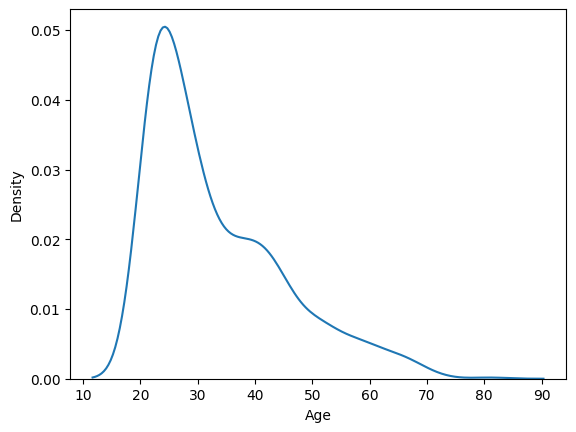

In [13]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

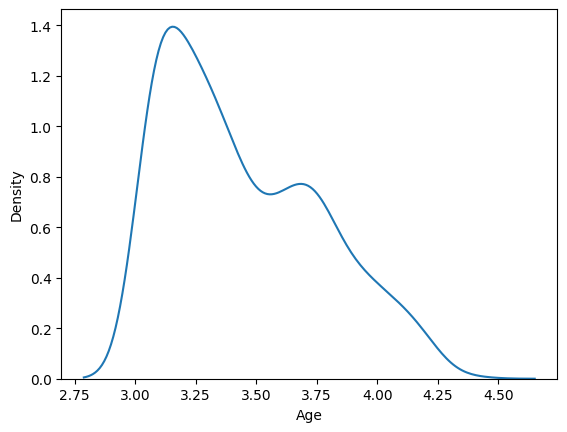

In [14]:
sns.kdeplot(np.log(df['Age']))

<AxesSubplot:xlabel='Age', ylabel='Density'>

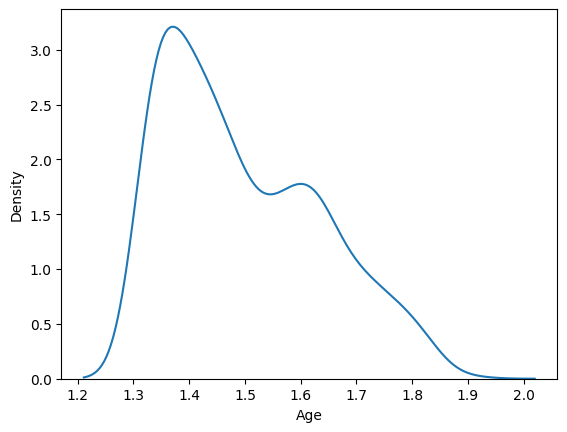

In [15]:
sns.kdeplot(np.log10(df['Age']))

In [3]:
import numpy as np

In [6]:
arr1 = np.random.randint(10,30,size = 20)

In [1]:
from sklearn.preprocessing import FunctionTransformer

In [7]:
funtrans = FunctionTransformer(func = np.log)
funtrans.fit_transform(arr1)
funtrans.

array([3.29583687, 3.33220451, 3.21887582, 2.7080502 , 3.13549422,
       3.33220451, 3.04452244, 2.94443898, 3.04452244, 3.33220451,
       2.77258872, 3.33220451, 2.77258872, 2.94443898, 2.30258509,
       3.25809654, 3.04452244, 3.36729583, 2.94443898, 3.29583687])

In [8]:
arr1

array([27, 28, 25, 15, 23, 28, 21, 19, 21, 28, 16, 28, 16, 19, 10, 26, 21,
       29, 19, 27])

In [9]:
funtrans.transform([21, 33, 57, 26])

array([3.04452244, 3.49650756, 4.04305127, 3.25809654])

In [ ]:
fit >> training
fit_transform >> training >> fit + transform for training
transform >> training + testing

In [22]:
arr2

array([ 58,  41,  48, 270,  50,  47,  22,  43,  41,  34,  20,  49,  59,
        47, 259,  22,  35,  49,  27,  38])

In [21]:
funtrans.transform(arr2)

array([4.06044301, 3.71357207, 3.87120101, 5.59842196, 3.91202301,
       3.8501476 , 3.09104245, 3.76120012, 3.71357207, 3.52636052,
       2.99573227, 3.8918203 , 4.07753744, 3.8501476 , 5.55682806,
       3.09104245, 3.55534806, 3.8918203 , 3.29583687, 3.63758616])

In [23]:
from sklearn.datasets import load_boston
from scipy.stats import skew

In [25]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:>

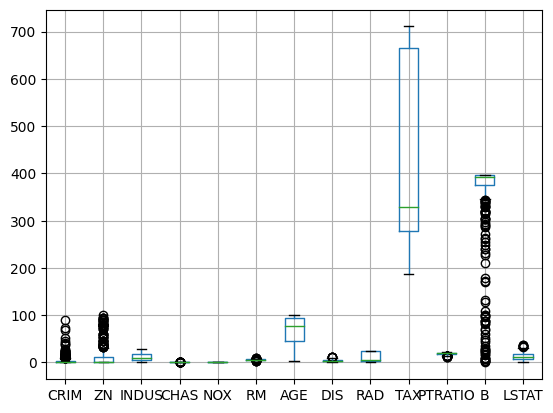

In [26]:
boston_df.boxplot()

<AxesSubplot:xlabel='DIS'>

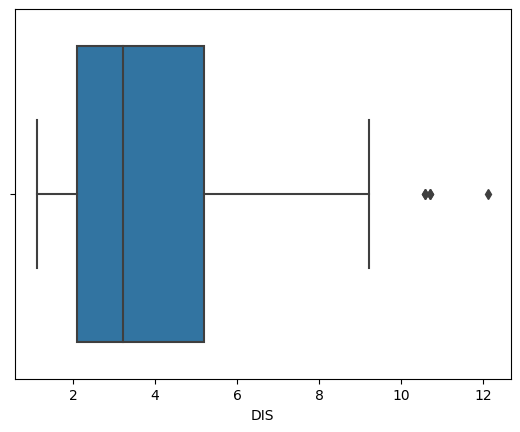

In [27]:
sns.boxplot(x = boston_df['DIS'])

<AxesSubplot:xlabel='DIS'>

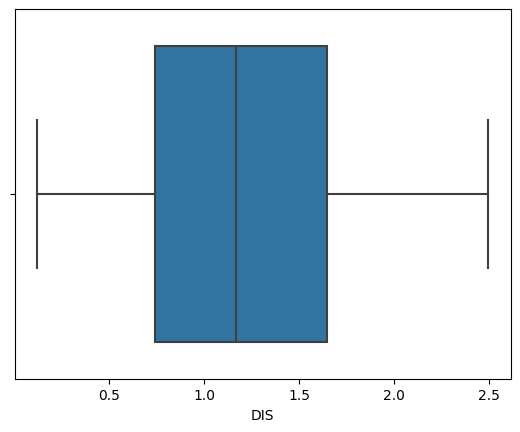

In [28]:
sns.boxplot(x = np.log(boston_df['DIS']))

<AxesSubplot:xlabel='B'>

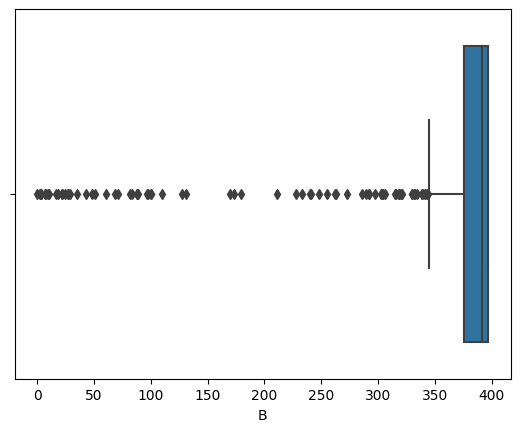

In [29]:
sns.boxplot(x = boston_df['B'])

<AxesSubplot:xlabel='B'>

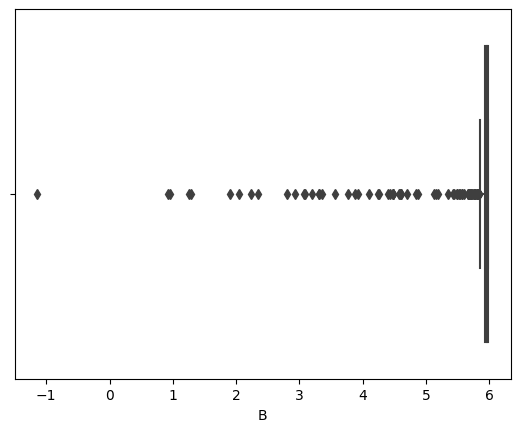

In [30]:
sns.boxplot(x = np.log(boston_df['B']))

<AxesSubplot:xlabel='DIS'>

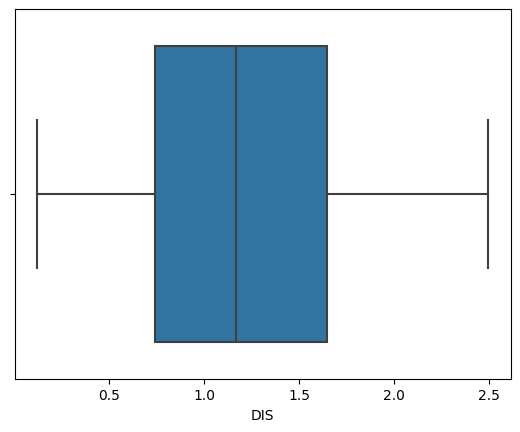

In [31]:
sns.boxplot(x = funtrans.transform(boston_df['DIS']))

## 2. Square root

<AxesSubplot:xlabel='DIS'>

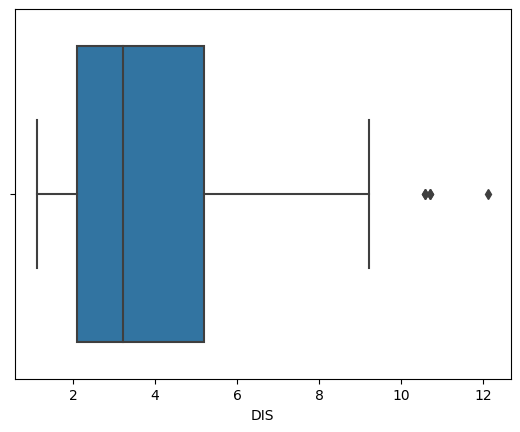

In [33]:
sns.boxplot(x = (boston_df['DIS']))

<AxesSubplot:xlabel='DIS'>

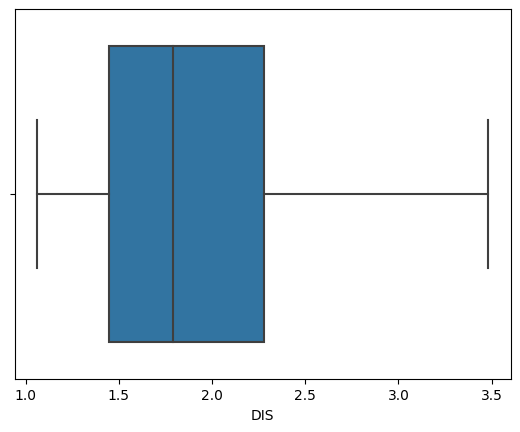

In [34]:
sns.boxplot(x = np.sqrt(boston_df['DIS']))

<AxesSubplot:xlabel='B'>

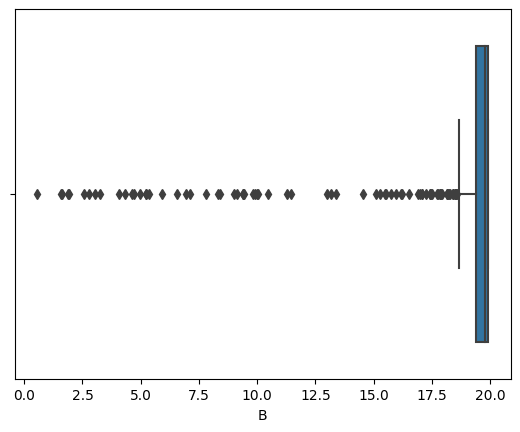

In [35]:
sns.boxplot(x = np.sqrt(boston_df['B']))

### 3. Square Transformation

In [46]:
arr3 = np.array([21, 33, 57, 26, 38, 27, 58, 48,1,1,2,3,5,4,3,4, 28, 58, 56, 27, 22, 38, 46, 45, 43,55, 34, 54])

<AxesSubplot:ylabel='Density'>

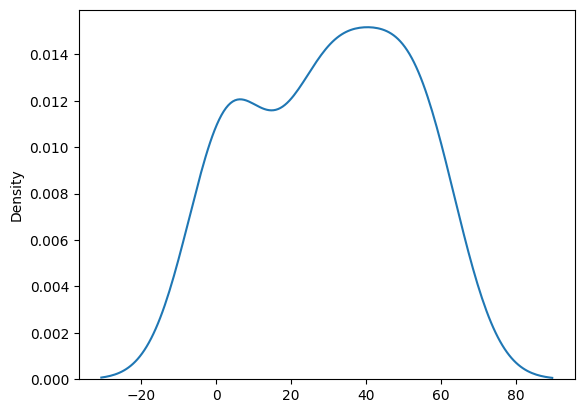

In [47]:
sns.kdeplot(arr3)

<AxesSubplot:>

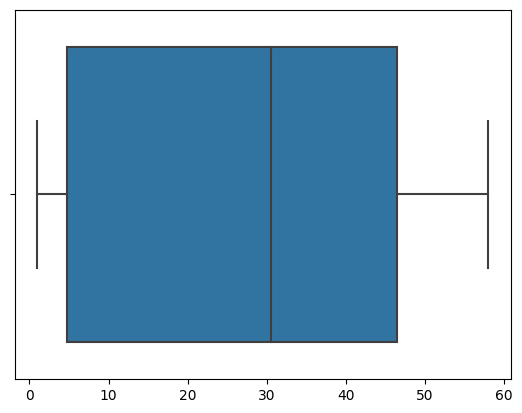

In [48]:
sns.boxplot(arr3)

<AxesSubplot:>

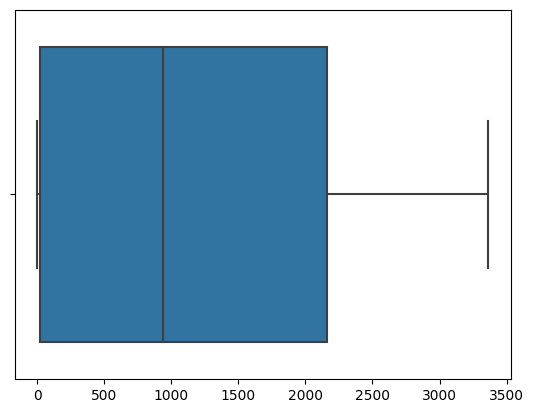

In [49]:
sns.boxplot(arr3**2)

### 4. Cuberoot

<AxesSubplot:xlabel='DIS'>

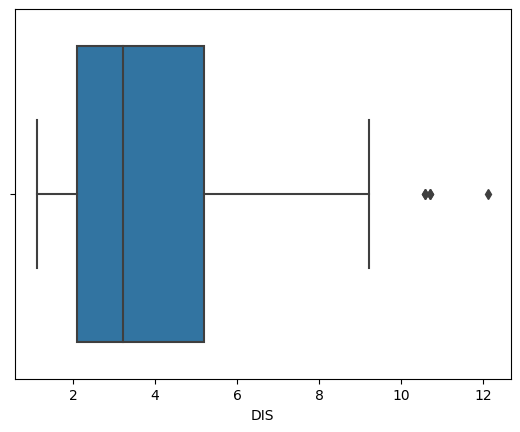

In [50]:
sns.boxplot(x = (boston_df['DIS']))

<AxesSubplot:xlabel='DIS'>

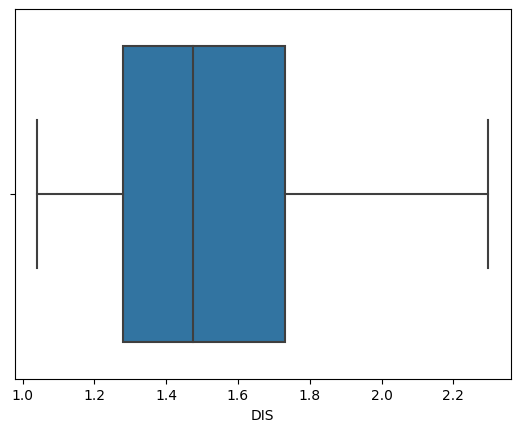

In [51]:
sns.boxplot(x = np.cbrt(boston_df['DIS']))

<AxesSubplot:xlabel='B'>

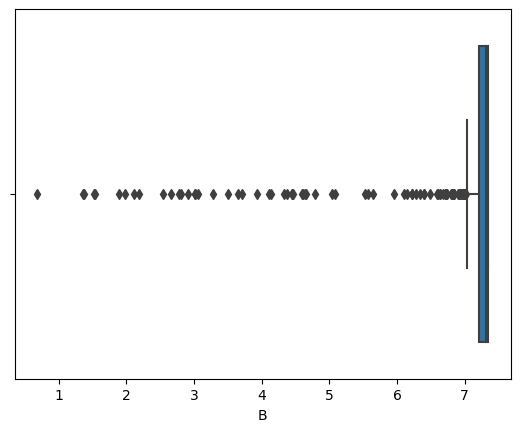

In [52]:
sns.boxplot(x = np.cbrt(boston_df['B']))

### 5. Reciprocal

In [ ]:
x = 100
1/100 >> 0.01

<AxesSubplot:xlabel='B', ylabel='Density'>

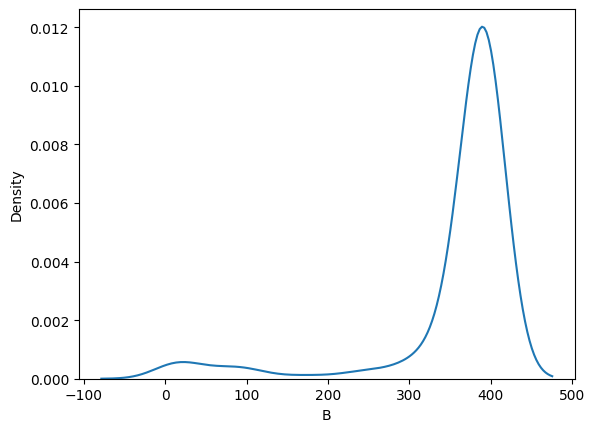

In [53]:
sns.kdeplot(boston_df['B'])

<AxesSubplot:xlabel='B', ylabel='Density'>

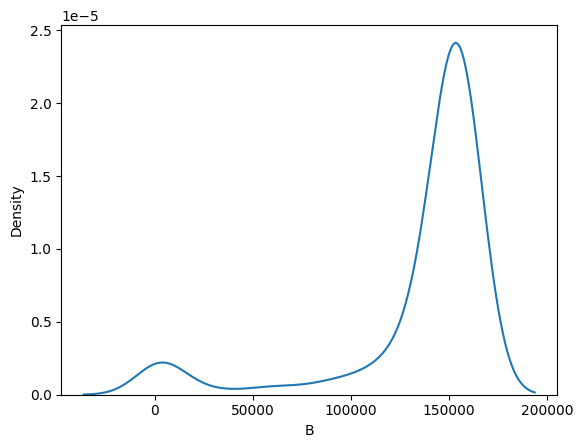

In [54]:
sns.kdeplot(boston_df['B'] **2)

<AxesSubplot:xlabel='B', ylabel='Density'>

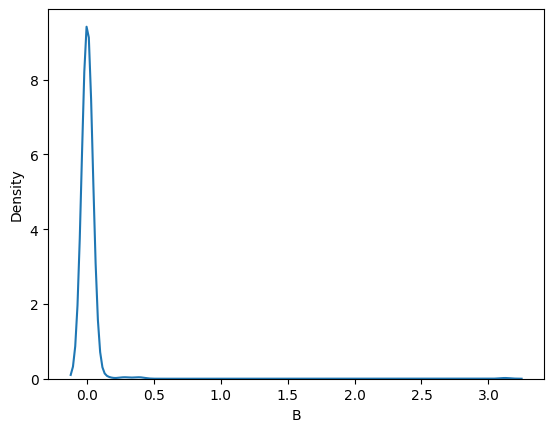

In [55]:
sns.kdeplot(1/boston_df['B'])

<AxesSubplot:xlabel='DIS'>

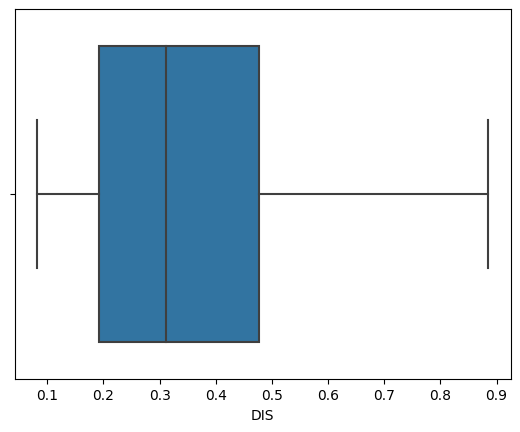

In [58]:
sns.boxplot(1/boston_df['DIS'])

<AxesSubplot:xlabel='B'>

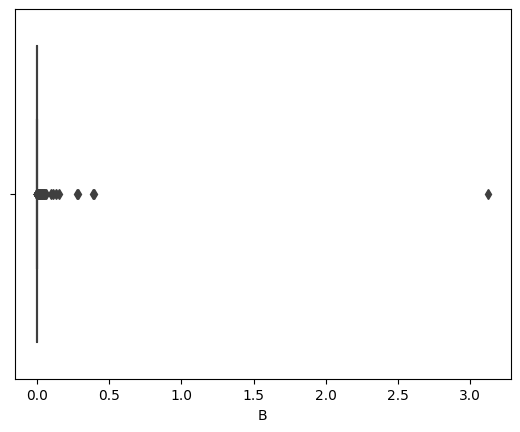

In [59]:
sns.boxplot(1/boston_df['B'])

## 6. Box-Cox Transformations

In [ ]:
Skewed Data >> Normally Distributed Data

In [ ]:
x^lambda -1 / lambda

lambda >> Explonent Value

To get Normal Distribution

Use it only for positive values

Limitation >> x == 0 or x == -ve

In [ ]:
Power Transfomer:
    1. Box-Cox Transfomer
    2. Yeo-Johnson Transfomer

In [10]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox

<AxesSubplot:xlabel='Age', ylabel='Density'>

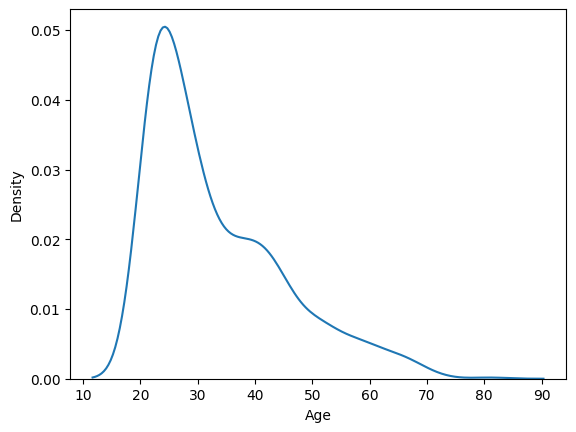

In [61]:
sns.kdeplot(df['Age'])

In [66]:
skew(df['Age'])

1.1264266838151251

<AxesSubplot:ylabel='Density'>

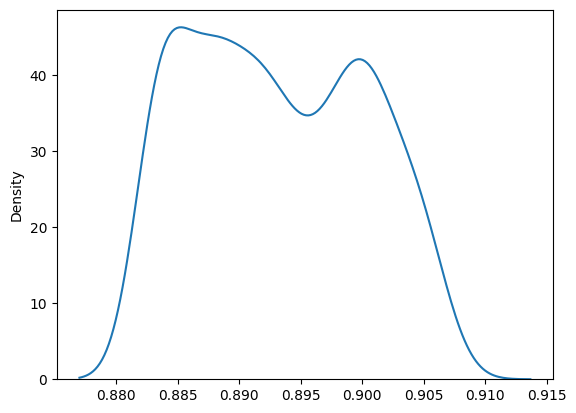

In [65]:
age1 = boxcox(df['Age'])[0]
sns.kdeplot(age1)

In [67]:
skew(age1)

0.14634729789600107

<AxesSubplot:xlabel='Age'>

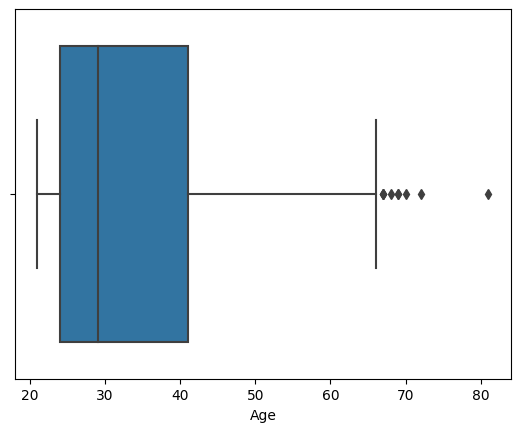

In [68]:
sns.boxplot(df['Age'])

<AxesSubplot:>

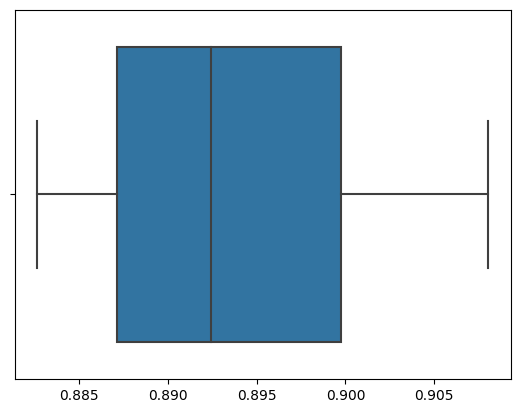

In [69]:
sns.boxplot(age1)

<AxesSubplot:xlabel='B'>

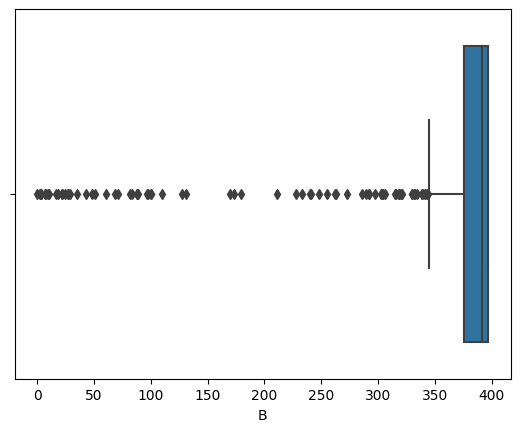

In [70]:
sns.boxplot(boston_df['B'])

<AxesSubplot:>

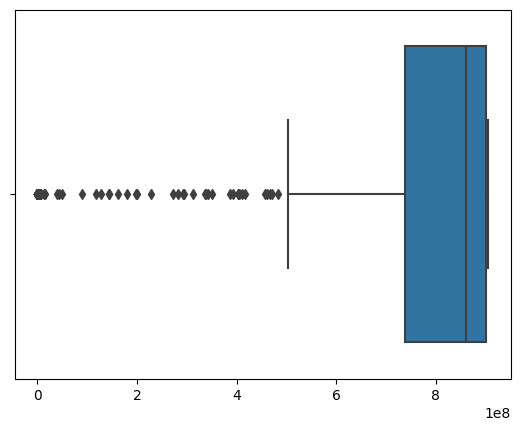

In [71]:
sns.boxplot(boxcox(boston_df['B'])[0])

<AxesSubplot:xlabel='B', ylabel='Density'>

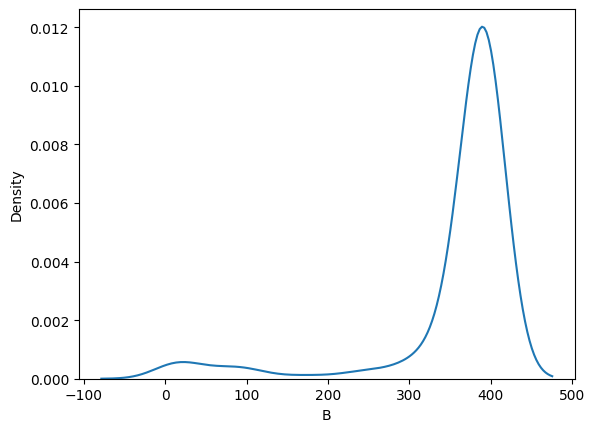

In [72]:
sns.kdeplot(boston_df['B'])

<AxesSubplot:ylabel='Density'>

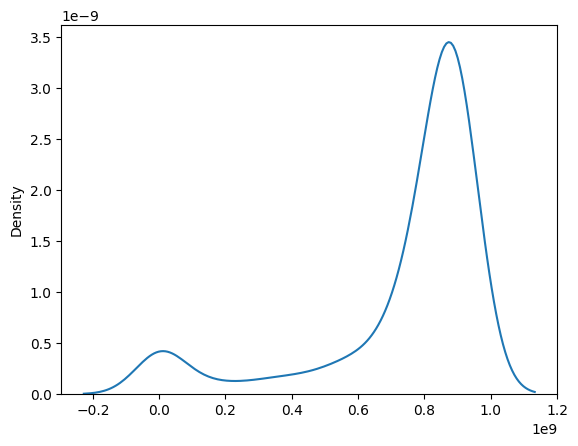

In [73]:
sns.kdeplot(boxcox(boston_df['B'])[0])

### 7. Yeo-Johnson Transformer

In [ ]:
Overcomes the limitation of boxcox

Gaussian Distribution

Apply a power transformer featurewise to make it data gaussian like.

<AxesSubplot:xlabel='Age'>

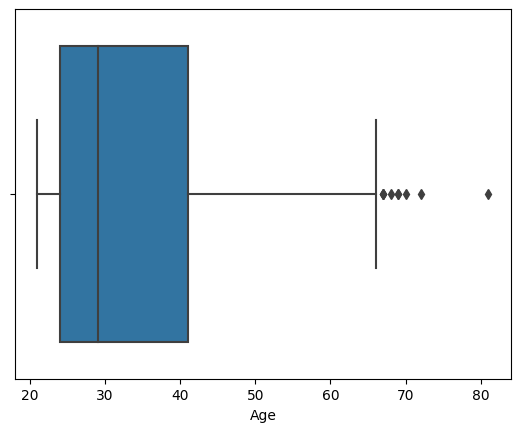

In [80]:
sns.boxplot(df['Age'])

<AxesSubplot:>

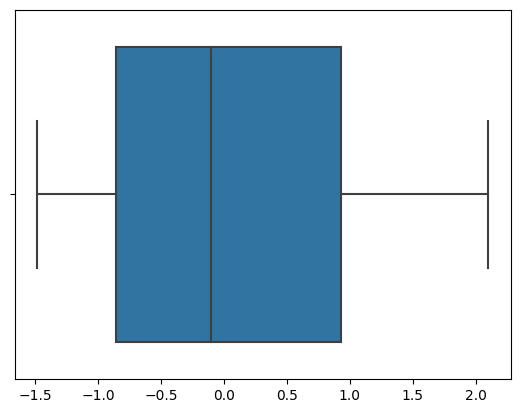

In [79]:
power_trans = PowerTransformer()
age2 = power_trans.fit_transform(df[['Age']])[:, 0]
sns.boxplot(age2)

<AxesSubplot:xlabel='B'>

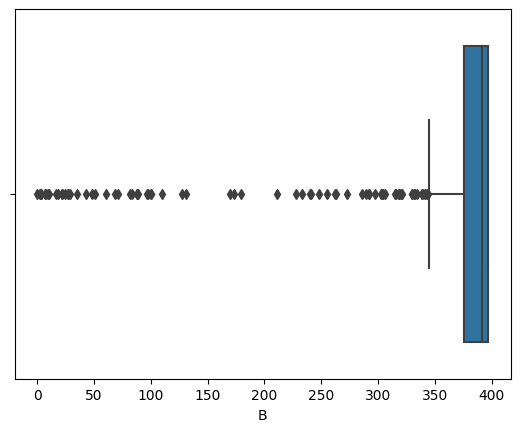

In [82]:
sns.boxplot(boston_df['B'])

<AxesSubplot:>

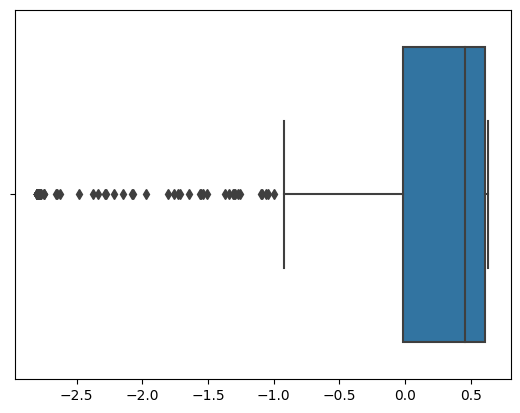

In [83]:
bstn_B = power_trans.fit_transform(boston_df[['B']])[:, 0]
sns.boxplot(bstn_B)

<AxesSubplot:>

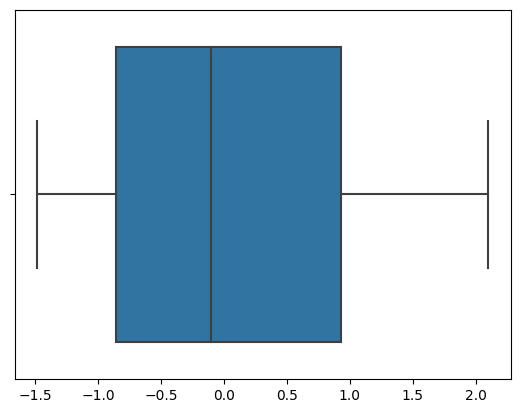

In [85]:
power_trans = PowerTransformer(method='yeo-johnson')  # Default
age2 = power_trans.fit_transform(df[['Age']])[:, 0]
sns.boxplot(age2)

<AxesSubplot:>

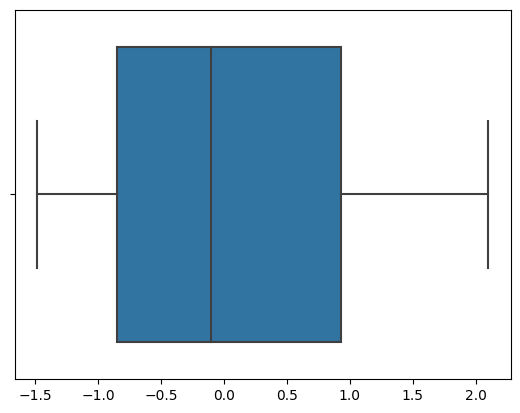

In [84]:
power_trans = PowerTransformer(method='box-cox')  
age2 = power_trans.fit_transform(df[['Age']])[:, 0]
sns.boxplot(age2)

In [ ]:
def model():
    
    